In [1]:
import torch
import torch.nn as nn
import numpy as np

from models.model import Autoencoder

from utils.data import autoloader
from utils.utils import forward

from torch.utils.data import DataLoader

from torchvision.utils import make_grid

from torch.autograd import Variable


import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
path = './dataset/'

A_path = path+'jaime'
B_path = path+'willyrex'

A_loader, B_loader = autoloader(A_path, B_path, bs=2, number_of_images=32)

In [3]:
#imshow method from: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

In [4]:
modelA = Autoencoder().to(device)

modelA.load_state_dict(torch.load('./checkpoints/epoch-5(A).pth'))
modelA.eval()

modelB = Autoencoder().to(device)

modelA.load_state_dict(torch.load('./checkpoints/epoch-5(B).pth'))
modelA.eval()

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (decoder): Sequential(
    (0): Upsample(scale_factor=2.0, mode=nearest)
    (1): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU(inplace=True)
    (3): Upsample(scale_factor=2.0, mode=nearest)
    (4): ConvTranspose2d(16, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): Sigmoid()
  )
)

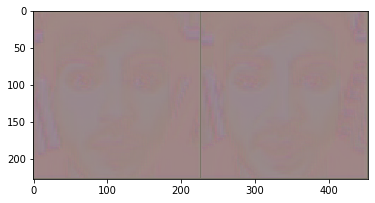

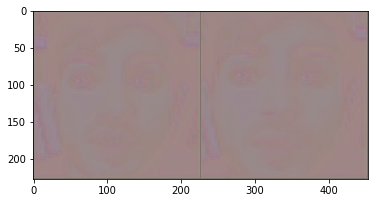

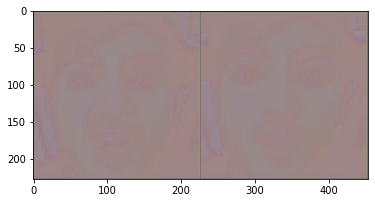

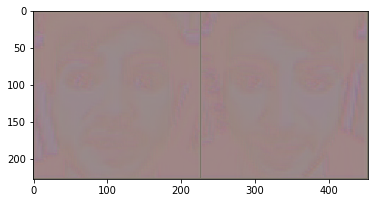

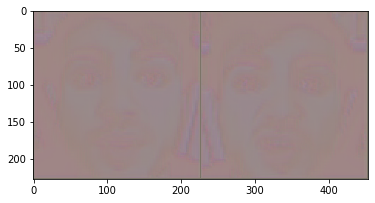

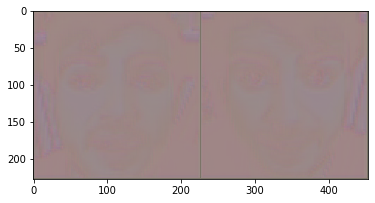

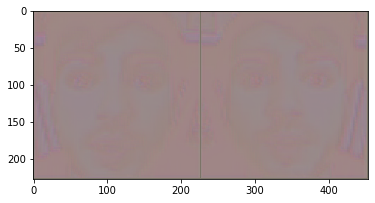

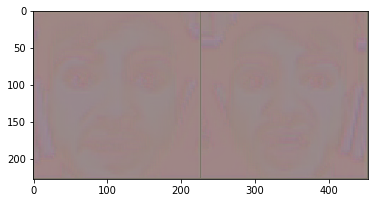

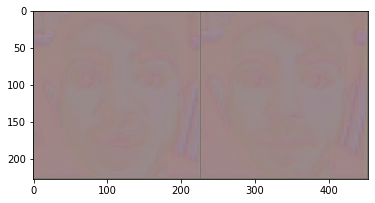

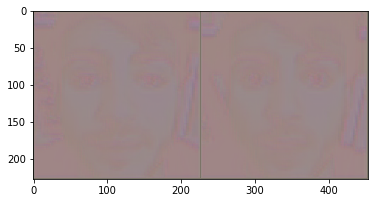

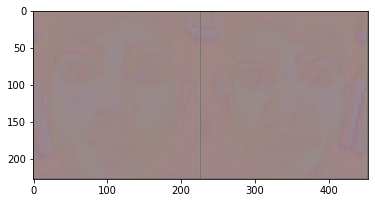

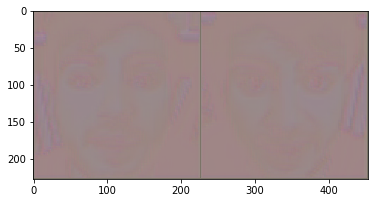

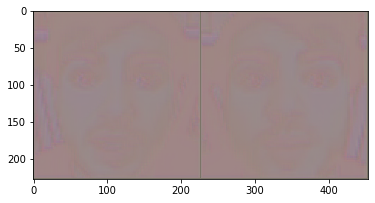

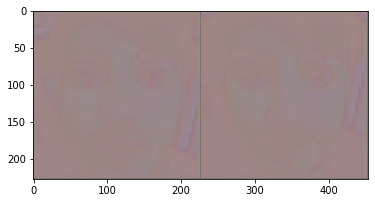

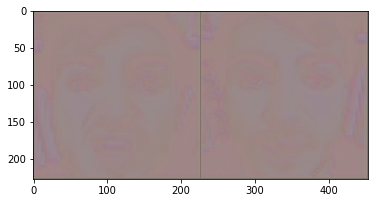

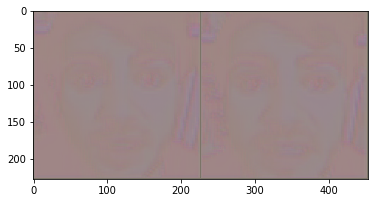

In [6]:
for (A_imgs, _), (B_imgs, _) in zip(A_loader, B_loader):
    A = Variable(A_imgs).to(device)
    B = Variable(B_imgs).to(device)
    
    outputsA = forward(A, modelA, modelB, 'A2B')
    #outputsA = modelA(A)
    outputsB = modelB(B)
    
    imshow(make_grid(outputsA.detach().cpu()))
    #imshow(make_grid(outputsB.detach().cpu()[0]))  